In [1]:
import numpy as np
import pickle as pickle
from scipy import signal
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

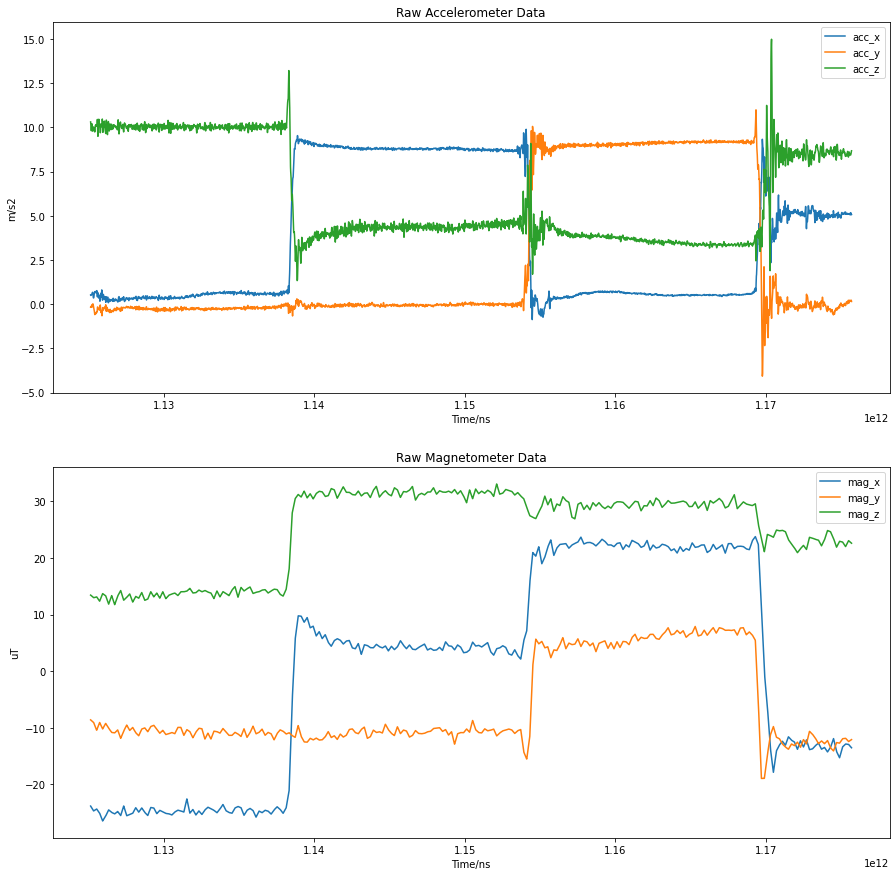

In [2]:
with open("./aggregated.pkl", "rb") as fid:
    data = pickle.load(fid)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))

# Retrieve ACC data.                                                                                                                                                    
ts_ACC = data['ACC'][:,0]  # Timestamps for ACC data.
acc_x = data['ACC'][:,1]
acc_y = data['ACC'][:,2]
acc_z = data['ACC'][:,3]

# Retrieve MAG data.
ts_MAG = data['MAG'][:,0]  # Timestamps for MAG data.
mag_x = data['MAG'][:,1]
mag_y = data['MAG'][:,2]
mag_z = data['MAG'][:,3]

# Orientation results.
ts_ORI = data['ORI'][:,0]  # Timestamps for ORIENTATION data.
pitch_ref = data['ORI'][:,1]
yaw_ref = data['ORI'][:,2]
roll_ref = data['ORI'][:,3]

# Plot ACC data.
ax1.plot(ts_ACC, acc_x)
ax1.plot(ts_ACC, acc_y)
ax1.plot(ts_ACC, acc_z)
ax1.set(xlabel='Time/ns', ylabel='m/s2', title='Raw Accelerometer Data')
ax1.legend(['acc_x', 'acc_y', 'acc_z'])

# Plot MAG data.
ax2.plot(ts_MAG, mag_x)
ax2.plot(ts_MAG, mag_y)
ax2.plot(ts_MAG, mag_z)
ax2.set(xlabel='Time/ns', ylabel='uT', title='Raw Magnetometer Data')
ax2.legend(['mag_x', 'mag_y', 'mag_z'])

# Part a.

In [16]:
def crossMultiply(a, b):
    return np.array([
            a[1]*b[2] - a[2]*b[1],
            a[0]*b[2] - a[2]*b[0],
            a[0]*b[1] - a[1]*b[0],
        ])

def getRotationMatrix(acc_x, acc_y, acc_z, mag_x, mag_y, mag_z):

    a = np.array(([acc_x], [acc_y], [acc_z]))
    m = np.array(([mag_x], [mag_y], [mag_z]))
    # a_cross_m = crossMultiply(a, m)
    a_cross_m = np.cross(a, m, axis=0)

    R = np.hstack((
        np.cross(a_cross_m, a, axis=0),
        # crossMultiply(a_cross_m, a),
        a_cross_m,
        a
    ))

    return R

def getOrientation(R):
    pitch = np.arcsin(R[0][2])
    yaw = np.arctan((R[1][2] / R[2][2]))
    roll = np.arctan((R[0][1] / R[0][0]))

    return (pitch, yaw, roll)
    

all_pitch = []
all_yaw = []
all_roll = []

for i in range(len(acc_x)):
    R = getRotationMatrix(acc_x[i], acc_y[i], acc_z[i], mag_x[i], mag_y[i], mag_z[i])
    (pitch, yaw, roll) = getOrientation(R)
    all_pitch.append(pitch)
    all_yaw.append(yaw)
    all_roll.append(roll)

<ipython-input-16-a592e98dce6f>:25: RuntimeWarning: invalid value encountered in arcsin
  pitch = np.arcsin(R[0][2])


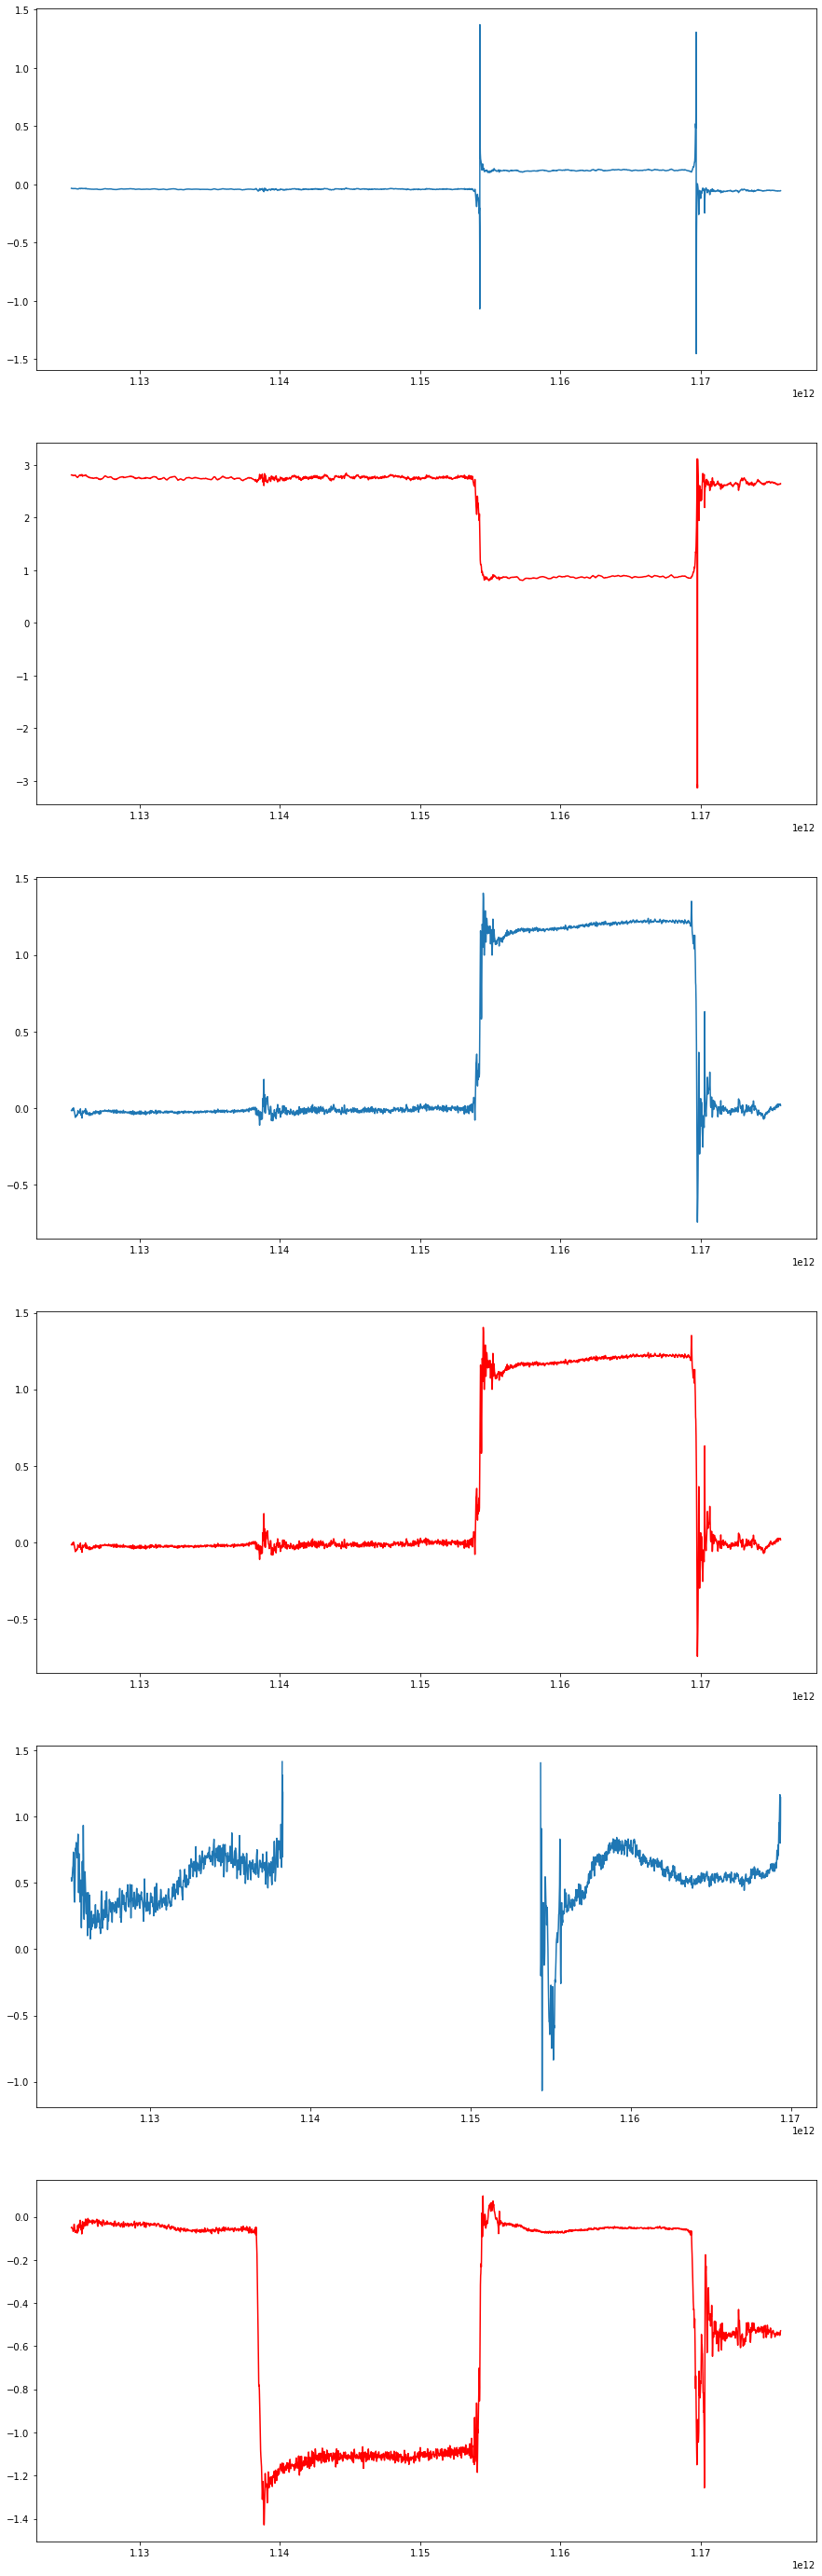

In [18]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(15,50))

ax1.plot(ts_ORI, all_roll)
ax2.plot(ts_ORI, roll_ref, color='r')

ax3.plot(ts_ORI, all_yaw)
ax4.plot(ts_ORI, yaw_ref, color='r')

ax5.plot(ts_ORI, all_pitch)
ax6.plot(ts_ORI, pitch_ref, color='r')


In [ ]:
def crossMultiply(a, b):
    return np.array([
            a[1]*b[2] - a[2]*b[1],
            a[0]*b[2] - a[2]*b[0],
            a[0]*b[1] - a[1]*b[0],
        ])

In [ ]:
R = getRotationMatrix(acc_x[0], acc_y[0], acc_z[0], mag_x[0], mag_y[0], mag_z[0])

sample_a = np.array([[acc_x[0]], [acc_y[0]], [acc_z[0]]])
sample_m = np.array([[mag_x[0]], [mag_y[0]], [mag_z[0]]])
a_x_m = np.cross(sample_a, sample_m, axis=0)

a_x_m_2 = crossMultiply(sample_a, sample_m)

print(a_x_m)
print(a_x_m_2)

print(crossMultiply(a_x_m_2, sample_a))
print(np.cross(a_x_m, sample_a, axis=0))


sample_R = np.hstack((
    np.cross(a_x_m, sample_a, axis=0),
    a_x_m,
    sample_a
))
